In [1]:
# %matplotlib notebook

import numpy as np

%matplotlib widget
  
# importing required libraries
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors

Function for getting EP and CC for L = 2 messages, n heat baths each with temperatures T = [T_1, T_2, ..., T_n], any signaling rate

In [2]:
# For L = 2 (number of messages)
# For n heat baths each with temperatures {T_1, T_2, ... T_n}

def K_p_I_EPR_l2 (f, e, T, R):
    '''
    inputs:
    f (float): input signaling rate, a non-negative real
    e (float): energetic difference between a match state and a mismatch state,
                where a match state is when the output state equals the input state,
                and a mismatch state is otherwise.
    T (arr of floats): an array of positive reals representing the temperatures of the reservoirs
    R (arr of floats): an array of positive reals, each corresponding to a particular reservoir, all defaulting to 1
                        
    outputs:
    p_m (float): probability of match
    p_mm (float): probability of mismatch
    I (float): mutual information between input and output at the nonequilibrium steady state (NESS)
    EPR (float): entropy production rate at the NESS
    '''
    
    # match rates due to each reservoir
    M = [r*np.exp(e/t)/(2*(np.exp(e/t) + 1)) for r, t in zip(R, T)]
    # mismatch rates due to each reservoir
    MM = [r/(2*(np.exp(e/t) + 1)) for r, t in zip(R, T)]
    
    # match rate
    m = sum(M)
    # mismatch rate
    mm = sum(MM)
    
    p_m = (m + f)/(m + mm + 2*f)
    p_mm = (mm + f)/(m + mm + 2*f)
    
    I = np.log(2) + p_m*np.log(p_m) + p_mm*np.log(p_mm)
    
    EPR = sum([(rmm*p_m - rm*p_mm)*np.log((rmm*p_m)/(rm*p_mm)) for rm, rmm in zip(M, MM)]) + (f*(p_m - p_mm))*np.log(p_m/p_mm)
    
    EPR_copy = sum([(rmm*p_m - rm*p_mm)*np.log((rmm*p_m)/(rm*p_mm)) for rm, rmm in zip(M, MM)])
    
    return m, mm, p_m, p_mm, I, EPR, EPR_copy

In [3]:
# f_input = .01
# num_reservoirs = 2
# e = 1
# T = [1, 0.75]
# R = [1, 1]

# xtitle = 'T1'
# ytitle = 'f_s'
# X = np.linspace(0.25, 5.25, 201)
# Y = np.linspace(0.0001, 1.0001, 1001)
# I_ = np.zeros(shape = (len(X), len(Y)))
# EPR_ = np.zeros(shape = (len(X), len(Y)))

# for i1, x in enumerate(X):
#     for i2, y in enumerate(Y):
#         m, mm, p_m, p_mm, I, EPR, EPR_copy = K_p_I_EPR_l2 (y, e, [x, T[1]], R)
#         I_[i1, i2] = I
#         EPR_[i1, i2] = EPR
        
# X_, Y_ = np.meshgrid(X, Y, indexing='ij')
    
# # creating figure
# fig = plt.figure(figsize=(10, 6))
# # ax1 = Axes3D(fig, auto_add_to_figure=False)
# # fig.add_axes(ax1)
# # ax2 = Axes3D(fig, auto_add_to_figure=False)
# # fig.add_axes(ax2)
# ax1 = fig.add_subplot(121,projection='3d')
# ax2 = fig.add_subplot(122,projection='3d')
  
# ax1.scatter(X_, Y_, EPR_, c=EPR_, cmap = 'viridis')
# ax1.set_xlabel(xtitle)
# ax1.set_ylabel(ytitle)
# ax1.set_zlabel('EPR')
# ax1.view_init(elev=10., azim=240)

# ax2.scatter(X_, Y_, I_, c=I_, cmap = 'magma')
# ax2.set_xlabel(xtitle)
# ax2.set_ylabel(ytitle)
# ax2.set_zlabel('CC')
# ax2.view_init(elev=10., azim=40)
  
# # displaying the plot
# plt.show()

In [4]:
# f_input = .01
# num_reservoirs = 2
# e = 1
# # T = [2, 2]
# R = [1, 1]

# xtitle = 'f_s'
# X = np.linspace(0.0001, .5001, 1001)
# I_ = np.zeros(shape = len(X))
# EPR_ = np.zeros(shape = len(X))

# # creating figure
# fig = plt.figure(figsize=(10, 4))
# # ax1 = Axes3D(fig, auto_add_to_figure=False)
# # fig.add_axes(ax1)
# # ax2 = Axes3D(fig, auto_add_to_figure=False)
# # fig.add_axes(ax2)
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)

# t2=1

# for i, t1 in enumerate(np.linspace(0.5,3,6)):
#     ax1.scatter(X, [K_p_I_EPR_l2 (x, e, [t1, t2], R)[5] for x in X], color=[0.2+i/8,0.5+i/10,0.8-i/8], s=2)

# ax1.set_xlabel(xtitle)
# ax1.set_ylabel('EPR')

# for i, t1 in enumerate(np.linspace(1,3,5)):
#     ax2.scatter(X, [K_p_I_EPR_l2 (x, e, [t1, t2], R)[4] for x in X], color=[0.5+i/10,0.2+i/5,0.6-i/10], s=2)
    
# ax2.set_xlabel(xtitle)
# ax2.set_ylabel('CC')
  
# # displaying the plot
# plt.show()

In [5]:
# num_reservoirs = 2
# e = 1
# R = [1, 1]

# xtitle = 'T_1'
# X = np.linspace(0.01, 10.01, 10001)
# I_ = np.zeros(shape = len(X))
# EPR_ = np.zeros(shape = len(X))

# # creating figure
# fig = plt.figure(figsize=(10, 4))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)

# t2=1
# f_s_vals = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1]

# for i, f_s in enumerate(f_s_vals):
#     Y = [K_p_I_EPR_l2 (f_s, e, [x, t2], R)[5] for x in X]
#     ymin = np.min(Y)
#     mask_s = np.array(Y) == ymin
#     mask_c = np.repeat(np.expand_dims(np.array(Y) == ymin, 1), 3, 1)*1
#     c_ = (0.2+i/8,0.5+i/12,0.8-i/8)
#     c = np.where(mask_c, [0,0,0], c_)
#     s = np.where(mask_s, 30, 2)
#     ax1.scatter(X, Y, color=c, s=s, label='f_s = ' + str(f_s))  

# ax1.set_xlabel(xtitle)
# ax1.set_ylabel('EPR')
# ax1.set_ylim([-0.1,2])
# ax1.legend()

# for i, f_s in enumerate(f_s_vals):
#     ax2.scatter(X, [K_p_I_EPR_l2 (f_s, e, [x, t2], R)[4] for x in X], color=[0.5+i/12,0.2+i/8,0.6-i/12], s=2, label='f_s = ' + str(f_s))
    
# ax2.set_xlabel(xtitle)
# ax2.set_ylabel('CC')
# ax2.legend()
  
# # displaying the plot
# plt.show()

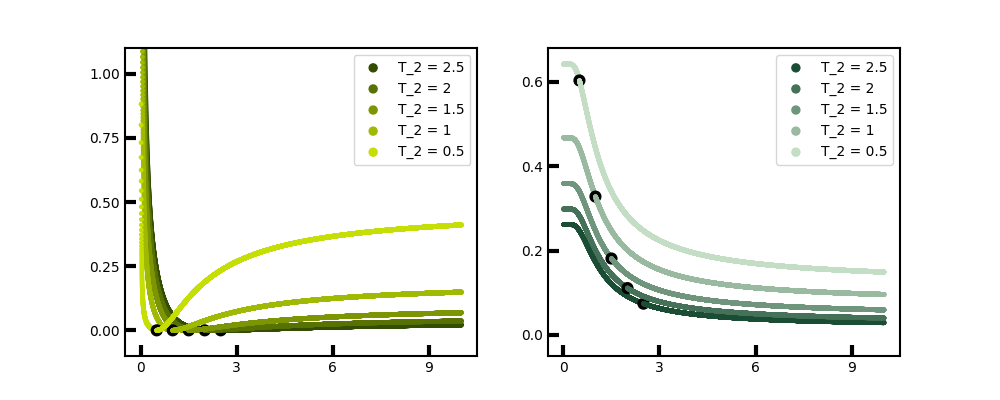

In [156]:
f_s = 0
num_reservoirs = 2
e = 2
R = [1, 1]

xtitle = 'T_1'
X = np.linspace(0.01, 10.01, 10001)
I_ = np.zeros(shape = len(X))
EPR_ = np.zeros(shape = len(X))

# creating figure
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

T2 = [2.5,2,1.5,1,.5]

for i, t2 in enumerate(T2):
    EPR = [K_p_I_EPR_l2 (f_s, e, [x, t2], R)[5] for x in X]
    ymin = np.min(EPR)
    mask_s = np.array(EPR) == ymin
    mask_c_EPR = np.repeat(np.expand_dims(np.array(EPR) == ymin, 1), 3, 1)*1
    c_ = (0.2+i/7,0.3+i/7,0.01)
    c_EPR = np.where(mask_c_EPR, [0,0,0], c_)
    s = np.where(mask_s, 60, 6)
    ax1.scatter(X, EPR, color=c_EPR, s=s, label='T_2 = ' + str(t2))  
    
    c_ = (0.1+i/6,0.3+i/7,0.2+i/7)
    c_CC = np.where(mask_c_EPR, [0,0,0], c_)
    CC = [K_p_I_EPR_l2 (f_s, e, [x, t2], R)[4] for x in X]
    ax2.scatter(X, CC, color=c_CC, s=s, label='T_2 = ' + str(t2))
    
# ax1.set_xlabel(xtitle)
# ax1.set_ylabel('EPR')
ax1.set_ylim([-0.1,1.1])
ax1.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax1.set_xticks([0,3,6,9])
ax1.tick_params(direction = 'in', length = 8, width = 3)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1.5)
ax1.legend()
    
# ax2.set_xlabel(xtitle)
# ax2.set_ylabel('CC')
ax2.set_ylim([-0.05,0.68])
ax2.set_yticks([0,0.2,0.4,0.6])
ax2.set_xticks([0,3,6,9])
ax2.tick_params(direction = 'in', length = 8, width = 3)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1.5)
ax2.legend()

plt.savefig('model_a_epr_cc_vs_t1_for_diff_t2s.png', transparent=True)
  
# displaying the plot
plt.show()

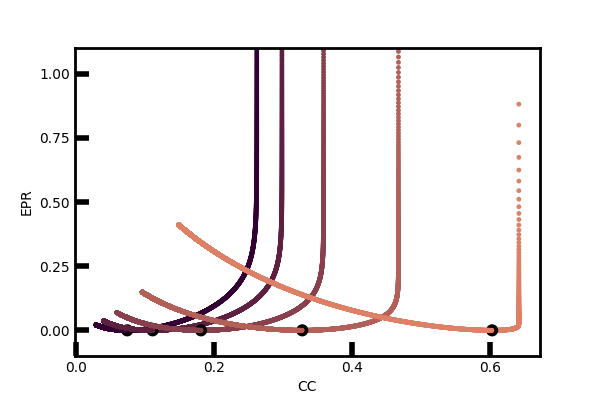

In [157]:
f_s = 0
num_reservoirs = 2
e = 2
# T = [2, 2]
R = [1, 1]

xtitle = 'T_1'
X = np.linspace(0.01, 10.01, 10001)
I_ = np.zeros(shape = len(X))
EPR_ = np.zeros(shape = len(X))

# creating figure
fig, ax = plt.subplots(figsize=(6, 4))

T2 = [2.5,2,1.5,1,.5]

for i, t2 in enumerate(T2):
    X_ = [K_p_I_EPR_l2 (f_s, e, [x, t2], R)[4] for x in X]
    Y = [K_p_I_EPR_l2 (f_s, e, [x, t2], R)[5] for x in X]
    ymin = np.min(Y)
    mask_s = np.array(Y) == ymin
    mask_c = np.repeat(np.expand_dims(np.array(Y) == ymin, 1), 3, 1)*1
    c_ = (0.2+i/6, 0.001+i/8, 0.2+i/20)
    c = np.where(mask_c, [0,0,0], c_)
    s = np.where(mask_s, 60, 6)
    ax.scatter(X_, Y, color=c, s=s, label='T_2 = ' + str(t2))  

ax.set_xlabel('CC')
ax.set_ylabel('EPR')
ax.set_ylim([-0.1,1.1])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticks([0,0.2,0.4,0.6])
ax.tick_params(direction = 'in', length = 10, width = 4)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# ax.legend()

plt.savefig('model_a_epr_vs_cc_for_diff_t2s.png', transparent=True)

# displaying the plot
plt.show()

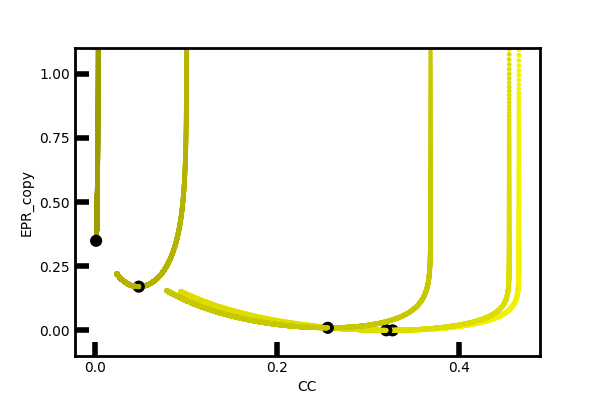

In [158]:
num_reservoirs = 2
e = 2
R = [1, 1]

X = np.linspace(0.01, 10.01, 10001)
I_ = np.zeros(shape = len(X))
EPR_ = np.zeros(shape = len(X))

# creating figure
fig, ax = plt.subplots(figsize=(6, 4))

f_s_vals = [0.0005, 0.005, 0.05, 0.5, 5]
# f_s_vals = [5, 0.5, 0.05, 0.005, 0.0005]
t2=1

for i, f_s in enumerate(f_s_vals):
    X_ = [K_p_I_EPR_l2 (f_s, e, [x, t2], R)[4] for x in X]
    Y = [K_p_I_EPR_l2 (f_s, e, [x, t2], R)[6] for x in X]
    ymin = np.min(Y)
    mask_s = np.array(Y) == ymin
    mask_c = np.repeat(np.expand_dims(np.array(Y) == ymin, 1), 3, 1)*1
    c_ = (0.95-i/12, 0.95-i/12, 0.001)
    c = np.where(mask_c, [0,0,0], c_)
    s = np.where(mask_s, 60, 6)
    ax.scatter(X_, Y, color=c, s=s, label='f_s = ' + str(f_s))  

ax.set_xlabel('CC')
ax.set_ylabel('EPR_copy')
ax.set_ylim([-0.1,1.1])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticks([0,0.2,0.4])
ax.tick_params(direction = 'in', length = 10, width = 4)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# ax.legend()

plt.savefig('model_b_epr_vs_cc_for_diff_fs.png', transparent=True)

# displaying the plot
plt.show()

Function for getting EP and CC for any positive integer l number of messages, n heat baths each with temperatures T = [T_1, T_2, ..., T_n], any signaling rate

In [13]:
def K_p_I_EPR (f, e, l, T, R):
    '''
    inputs:
    f (float): input signaling rate, a non-negative real
    e (float): energetic difference between a match state and a mismatch state,
                where a match state is when the output state equals the input state,
                and a mismatch state is otherwise.
    l (int): number of messages to be sent through the channel
    T (arr of floats): an array of positive reals representing the temperatures of the reservoirs
    R (arr of floats): an array of positive reals, each corresponding to a particular reservoir, all defaulting to 1
                        
    outputs:
    p_m (float): probability of match
    p_mm (float): probability of mismatch
    I (float): mutual information between input and output at the nonequilibrium steady state (NESS)
    EPR (float): entropy production rate at the NESS
    '''
    
    # match rates due to each reservoir
    M = [r*np.exp(e/t)/(l*(np.exp(e/t) + (l-1))) for r, t in zip(R, T)]
    # mismatch rates due to each reservoir
    MM = [r/(l*(np.exp(e/t) + (l-1))) for r, t in zip(R, T)]
    
    # match rate
    m = sum(M)
    # mismatch rate
    mm = sum(MM)
    
    p_m = (m + f)/(m + (l-1)*mm + l*f)
    p_mm = (mm + f)/(m + (l-1)*mm + l*f)
    
    I = np.log(l) + p_m*np.log(p_m) + (l-1)*p_mm*np.log(p_mm)
    
    EPR = (l-1)*sum([(rmm*p_m - rm*p_mm)*np.log((rmm*p_m)/(rm*p_mm)) for rm, rmm in zip(M, MM)]) + (l-1)*(f*(p_m - p_mm))*np.log(p_m/p_mm)
    
    EPR_copy = (l-1)*sum([(rmm*p_m - rm*p_mm)*np.log((rmm*p_m)/(rm*p_mm)) for rm, rmm in zip(M, MM)])
    
    return m, mm, p_m, p_mm, I, EPR, EPR_copy

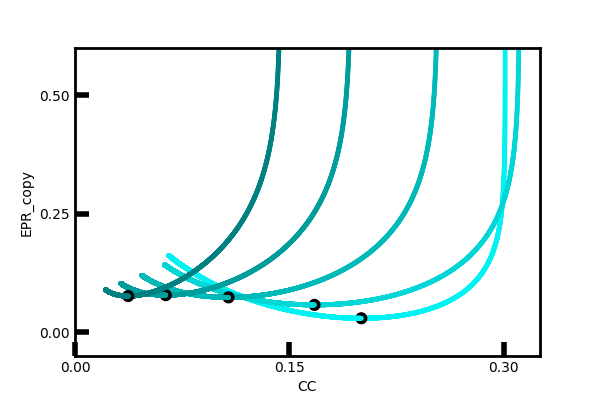

In [22]:
f_s = 0.1
num_reservoirs = 2
e = 2
R = [1, 1]

X = np.linspace(0.01, 10.01, 10001)
I_ = np.zeros(shape = len(X))
EPR_ = np.zeros(shape = len(X))

# creating figure
fig, ax = plt.subplots(figsize=(6, 4))

L = [2,3,4,5,6]
t2=1

for i, l in enumerate(L):
    X_ = [K_p_I_EPR (f_s, e, l, [x, t2], R)[4] for x in X]
    Y = [K_p_I_EPR (f_s, e, l, [x, t2], R)[6] for x in X]
    ymin = np.min(Y)
    mask_s = np.array(Y) == ymin
    mask_c = np.repeat(np.expand_dims(np.array(Y) == ymin, 1), 3, 1)*1
    c_ = (0.001, 0.95-i/9, 0.95-i/9)
    c = np.where(mask_c, [0,0,0], c_)
    s = np.where(mask_s, 60, 6)
    ax.scatter(X_, Y, color=c, s=s, label='L = ' + str(l))  

ax.set_xlabel('CC')
ax.set_ylabel('EPR_copy')
ax.set_ylim([-0.05,0.6])
ax.set_yticks([0, 0.25, 0.5])
ax.set_xticks([0,0.15,0.3])
ax.tick_params(direction = 'in', length = 10, width = 4)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# ax.legend()

plt.savefig('model_b_epr_vs_cc_for_diff_L.png', transparent=True)

# displaying the plot
plt.show()

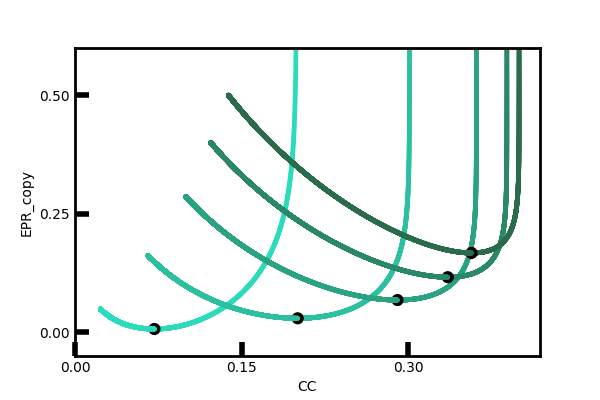

In [15]:
f_s = 0.1
num_reservoirs = 2
l = 2
R = [1, 1]

X = np.linspace(0.01, 10.01, 10001)
I_ = np.zeros(shape = len(X))
EPR_ = np.zeros(shape = len(X))

# creating figure
fig, ax = plt.subplots(figsize=(6, 4))

E = [1,2,3,4,5]
t2=1

for i, e in enumerate(E):
    X_ = [K_p_I_EPR (f_s, e, l, [x, t2], R)[4] for x in X]
    Y = [K_p_I_EPR (f_s, e, l, [x, t2], R)[6] for x in X]
    ymin = np.min(Y)
    mask_s = np.array(Y) == ymin
    mask_c = np.repeat(np.expand_dims(np.array(Y) == ymin, 1), 3, 1)*1
    c_ = (42/255, 220/255-i/9, 188/255-i/9)
#     c_ = (0.001, 0.95-i/9, 0.95-i/9)
    c = np.where(mask_c, [0,0,0], c_)
    s = np.where(mask_s, 60, 6)
    ax.scatter(X_, Y, color=c, s=s, label='e = ' + str(e))  

ax.set_xlabel('CC')
ax.set_ylabel('EPR_copy')
ax.set_ylim([-0.05,0.6])
ax.set_yticks([0, 0.25, 0.5])
ax.set_xticks([0,0.15,0.3])
ax.tick_params(direction = 'in', length = 10, width = 4)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# ax.legend()

plt.savefig('model_b_epr_vs_cc_for_diff_e.png', transparent=True)

# displaying the plot
plt.show()

Plotting the Pareto frontier:

In [18]:
from itertools import product

'''
A VERY INEFFICIENT WAY TO PLOT THE PARETO FRONTIER FOR DIFFERENT N's
'''

f_s = 0.1
num_reservoirs = 2
e = 2
l = 4
R = [1, 1]

X1 = np.linspace(0.01, 3.01, 41)
C_EPR_pairs = []
delta = 0.008

t2=1
for x1, x2 in product(X1, X1):
    C1 = K_p_I_EPR (f_s, e, l, [x1, t2], R)[4]
    C2 = K_p_I_EPR (f_s, e, l, [x2, t2], R)[4]
    EPR_copy1 = K_p_I_EPR (f_s, e, l, [x1, t2], R)[6]
    EPR_copy2 = K_p_I_EPR (f_s, e, l, [x2, t2], R)[6]
    C_EPR_pairs.append([C1+C2, EPR_copy1 + EPR_copy2])

C_EPR_pairs = np.array(C_EPR_pairs)
C_EPR_pairs_sorted = C_EPR_pairs[C_EPR_pairs[:, 0].argsort()]

frontier_2 = [[0,0]]
# delta = 0.005

for c, epr in C_EPR_pairs_sorted:
    if c < frontier_2[-1][0] + delta and c > frontier_2[-1][0] - delta:
        if epr < frontier_2[-1][1]:
            frontier_2.pop()
            frontier_2.append([c, epr])
    else:
        frontier_2.append([c, epr])

frontier_2.pop(0)
        
    
    
C_EPR_pairs = []

for x1, x2, x3 in product(X1, X1, X1):
    C1 = K_p_I_EPR (f_s, e, l, [x1, t2], R)[4]
    C2 = K_p_I_EPR (f_s, e, l, [x2, t2], R)[4]
    C3 = K_p_I_EPR (f_s, e, l, [x3, t2], R)[4]
    EPR_copy1 = K_p_I_EPR (f_s, e, l, [x1, t2], R)[6]
    EPR_copy2 = K_p_I_EPR (f_s, e, l, [x2, t2], R)[6]
    EPR_copy3 = K_p_I_EPR (f_s, e, l, [x3, t2], R)[6]
    C_EPR_pairs.append([C1+C2+C3, EPR_copy1 + EPR_copy2 + EPR_copy3])

C_EPR_pairs = np.array(C_EPR_pairs)
C_EPR_pairs_sorted = C_EPR_pairs[C_EPR_pairs[:, 0].argsort()]

frontier_3 = [[0,0]]
# delta = 0.005

for c, epr in C_EPR_pairs_sorted:
    if c < frontier_3[-1][0] + delta and c > frontier_3[-1][0] - delta:
        if epr < frontier_3[-1][1]:
            frontier_3.pop()
            frontier_3.append([c, epr])
    else:
        frontier_3.append([c, epr])

frontier_3.pop(0)
    
    
    
C_EPR_pairs = []

for x1, x2, x3, x4 in product(X1, X1, X1, X1):
    C1 = K_p_I_EPR (f_s, e, l, [x1, t2], R)[4]
    C2 = K_p_I_EPR (f_s, e, l, [x2, t2], R)[4]
    C3 = K_p_I_EPR (f_s, e, l, [x3, t2], R)[4]
    C4 = K_p_I_EPR (f_s, e, l, [x4, t2], R)[4]
    EPR_copy1 = K_p_I_EPR (f_s, e, l, [x1, t2], R)[6]
    EPR_copy2 = K_p_I_EPR (f_s, e, l, [x2, t2], R)[6]
    EPR_copy3 = K_p_I_EPR (f_s, e, l, [x3, t2], R)[6]
    EPR_copy4 = K_p_I_EPR (f_s, e, l, [x4, t2], R)[6]
    C_EPR_pairs.append([C1+C2+C3+C4, EPR_copy1 + EPR_copy2 + EPR_copy3 + EPR_copy4])

C_EPR_pairs = np.array(C_EPR_pairs)
C_EPR_pairs_sorted = C_EPR_pairs[C_EPR_pairs[:, 0].argsort()]

frontier_4 = [[0,0]]
# delta = 0.005

for c, epr in C_EPR_pairs_sorted:
    if c < frontier_4[-1][0] + delta and c > frontier_4[-1][0] - delta:
        if epr < frontier_4[-1][1]:
            frontier_4.pop()
            frontier_4.append([c, epr])
    else:
        frontier_4.append([c, epr])

frontier_4.pop(0)

[0, 0]

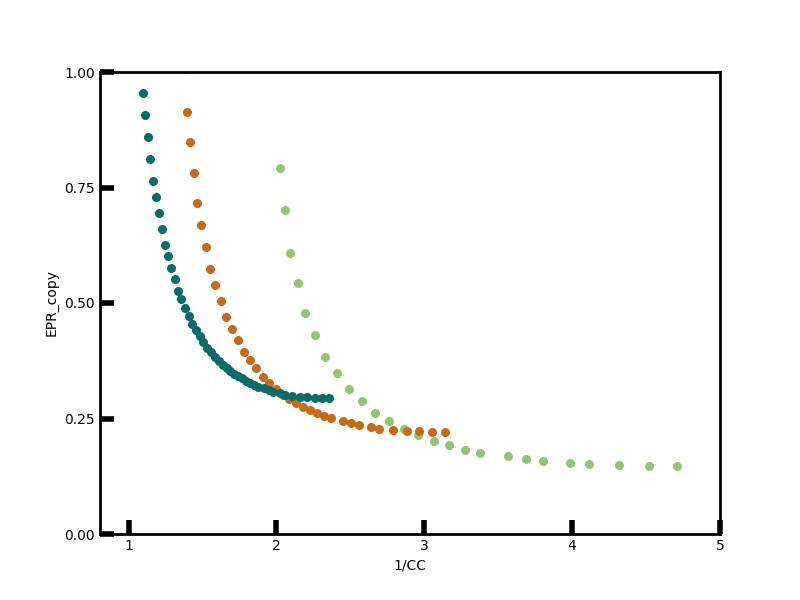

In [20]:
# creating figure
fig, ax = plt.subplots(figsize=(8, 6))

for c, epr in frontier_2:
    ax.scatter(1/c, epr, s=30, color=(147/255, 197/255, 114/255))  

for c, epr in frontier_3:
    ax.scatter(1/c, epr, s=30, color=(197/255, 107/255, 24/255))  

for c, epr in frontier_4:
    ax.scatter(1/c, epr, s=30, color=(7/255, 107/255, 104/255))  
    
ax.set_xlabel('1/CC')
ax.set_ylabel('EPR_copy')
ax.set_ylim([-0,1])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticks([1,2,3,4,5])
ax.tick_params(direction = 'in', length = 10, width = 4)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.show()

plt.savefig('pareto_front.png', transparent=True)

2
3
4
5
6


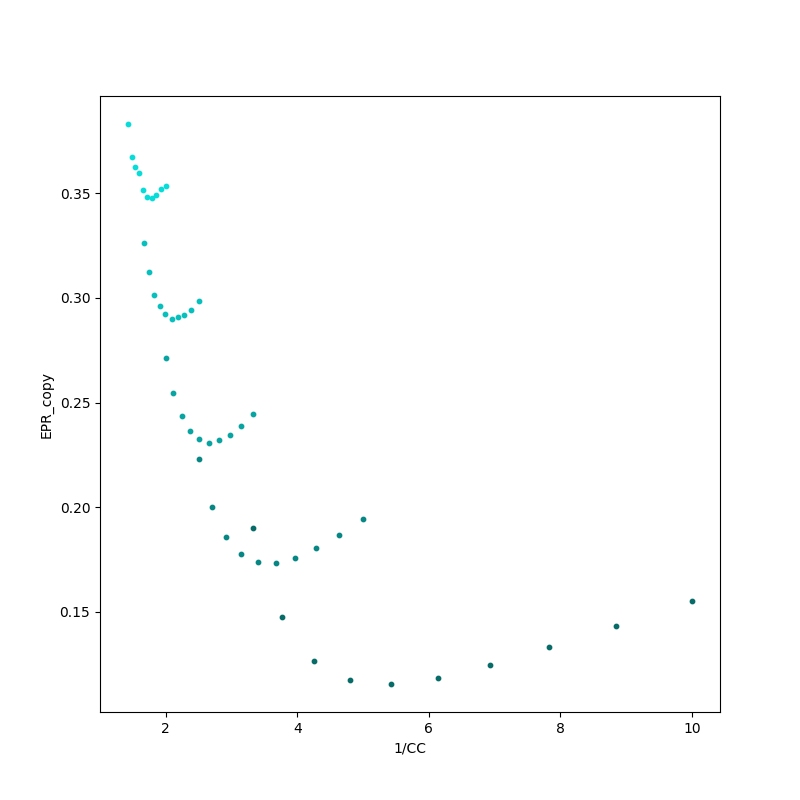

In [249]:
f_s = 0.1
num_reservoirs = 2
e = 2
l = 3
R = [1, 1]

T1 = np.linspace(0.01, 10.01, 100001)
# T1 = np.logspace(-4, 1, 100001)
f = lambda t1: K_p_I_EPR (f_s, e, l, [t1, t2], R)
out = np.array(list((map(f, T1))))
EPR_fcn_of_C = out[:,[4,6]]

delta = 0.0005

def get_multiplex_pairs (n, cc, EPR_lookup, m):
#     print(EPR_lookup)

    def get_epr_for_cc(cc_val):
        mask = EPR_lookup[:, 0] < cc_val + delta
        epr_ = EPR_lookup[mask, :]
        mask = epr_[:, 0] > cc_val - delta
        epr = epr_[mask, :][0][1]
        return epr
    
    def get_epr_for_cc_is(cc_i):
        epr_i = np.array(list(map(get_epr_for_cc, cc_i)))
        all_eprs.append(sum(epr_i))
    
    all_eprs = []
    
#     equi_binning = np.array([cc/n for i in range(n)])
#     get_epr_for_cc_is(equi_binning)

    i = 0
    while i < m:
#     for i in range(m):
#         offset = np.random.uniform(low = -0.3*cc/n, high=0.3*cc/n, size=(n,))
#         offset = offset - np.mean(offset)
#         cc_i = equi_binning + offset
        a = np.random.uniform(low = 0, high=100, size=(n,))
        cc_i = a*cc/sum(a)
#         print(cc_i)
        try:
            epr_i = np.array(list(map(get_epr_for_cc, cc_i)))
            all_eprs.append(sum(epr_i))
            i += 1
        except:
            pass
        
        
#     print(all_eprs)
#     print(np.min(all_eprs))
#     print(np.max(all_eprs))

    return [cc, np.min(all_eprs)]

num_c_vals = 10
c_2 = np.logspace(np.log10(0.1),np.log10(0.3),num_c_vals)
c_3 = np.logspace(np.log10(0.2),np.log10(0.4),num_c_vals)
c_4 = np.logspace(np.log10(0.3),np.log10(0.5),num_c_vals)
c_5 = np.logspace(np.log10(0.4),np.log10(0.6),num_c_vals)
c_6 = np.logspace(np.log10(0.5),np.log10(0.7),num_c_vals)
CC = [c_2, c_3, c_4, c_5, c_6]
N = [2,3,4,5,6]

to_plot = np.zeros(shape=(len(N), num_c_vals, 2))

for i, [n, c_n] in enumerate(zip(N, CC)):
    print(n)
    to_plot[i] = np.array([get_multiplex_pairs(n, c_, EPR_fcn_of_C, 1000) for c_ in c_n])
    
# print(to_plot)

# creating figure
fig, ax = plt.subplots(figsize=(8, 8))
for i, row in enumerate(to_plot):
    for c, epr in row:
        ax.scatter(1/c, epr, s=10, color=(7/255, 107/255 + i/9, 104/255 + i/9))  
        
ax.set_xlabel('1/CC')
ax.set_ylabel('EPR_copy')
# ax.set_ylim([-0.5,5])

plt.show()

In [47]:
def find_pareto_optimal_2_channels(C, f_s, e, T2):
    '''
    Assumes 2 reservoirs
    
    inputs:
        C (float): total desired information rate
        f_s (float): input signaling rate
        e (float): energy benefit of matched state
        T2 (float): temperature of second heat bath
    outputs:
        [C1, C2]: the channel capacities of the two channels that minimize their combined EP rate
        min_EP: the value of that minimal EP
    
    '''
    
    C1 = np.linspace(0, C, 101)
    C2 = C - C1